In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import requests

from bs4 import BeautifulSoup
import QuantLib as ql

In [11]:
from quant_lib import curve as cv

In [7]:
ref_date = cv.get_date()
quote = cv.get_quote(ref_date)
print(quote)
curve = cv.treasury_curve(ref_date, quote)

             days  price coupon
maturity                       
2022-10-25     26  2.573    0.0
2022-12-29     91  3.301    0.0
2023-03-30    182  3.914    0.0
2023-09-07    343  3.805    0.0
2024-09-30    732  4.188   4.25
2025-09-15   1082  4.199    3.5
2027-09-30   1827  3.991  4.125
2029-09-30   2558   3.89  3.875
2032-08-15   3608  3.753   2.75
2052-08-15  10913  3.694    3.0


In [12]:
# Convert into Engine
spotCurveHandle=ql.YieldTermStructureHandle(curve)
bondEngine=ql.DiscountingBondEngine(spotCurveHandle)

In [13]:
# pricing treasury bond with FixedRateBond() method
# Treasury Bond Specification
from calendar import calendar
from sqlite3 import Date


issueDate=ql.Date(30,9,2022)
maturityDate=ql.Date(15,8,2032)
tenor=ql.Period(ql.Semiannual)
calendar=ql.UnitedStates()
convention=ql.ModifiedFollowing
dateGeneration=ql.DateGeneration.Backward
monthEnd=False
schedule=ql.Schedule(issueDate, maturityDate, tenor,
                    calendar, convention, convention,
                    dateGeneration, monthEnd)
dayCount=ql.ActualActual()
couponRate=[0.0175]
settlementDays=1
faceValue=100

In [14]:
fixedRateBond=ql.FixedRateBond(settlementDays, faceValue, schedule, couponRate, dayCount)

In [15]:
# conduct pricing
fixedRateBond.setPricingEngine(bondEngine)

In [16]:
# Result
print("Bond Price = {}".format(round(fixedRateBond.NPV(),4)))
for cf in fixedRateBond.cashflows():
    print('%20s %12f' % (cf.date(), cf.amount()))

Bond Price = 91.7212
 February 15th, 2023     0.661644
   August 15th, 2023     0.867808
 February 15th, 2024     0.881602
   August 15th, 2024     0.870219
 February 18th, 2025     0.894754
   August 15th, 2025     0.853425
 February 17th, 2026     0.891781
   August 17th, 2026     0.867808
 February 16th, 2027     0.877397
   August 16th, 2027     0.867808
 February 15th, 2028     0.876808
   August 15th, 2028     0.870219
 February 15th, 2029     0.880371
   August 15th, 2029     0.867808
 February 15th, 2030     0.882192
   August 15th, 2030     0.867808
 February 18th, 2031     0.896575
   August 15th, 2031     0.853425
 February 17th, 2032     0.891165
   August 16th, 2032     0.865437
   August 16th, 2032   100.000000


### Important reminder
Result of this module is based on 2022 October market data. 
Due to unexpected rate hike of Federal Reserve, interest rate curve is inverted.
So, derivative product based on rate curve shows unique characteristics.
This is special situation, So result at normal market condition will be different.


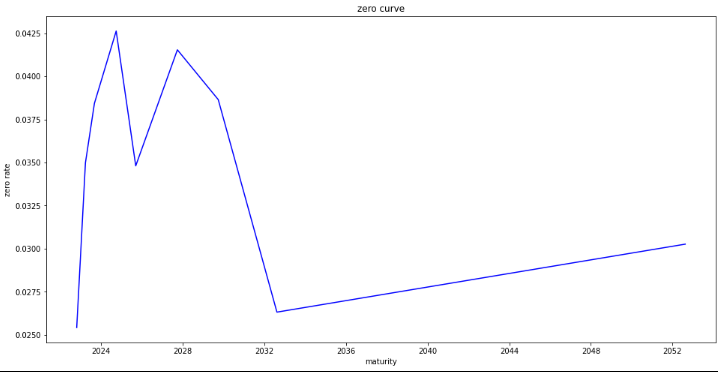

In [4]:
from IPython.display import Image
Image('post_assets/inverted_curve.png')